<h1>Final Analysis - Complete Bias Between Spindles & Non-Spindles (Only MASS Subject #1)</h1>

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing libraries for statistical testing:
from scipy.stats import ttest_ind


<h2>Importing The Dataset + Preprocessing</h2>

In [3]:
# Absolute filepath for the spindle dataset (for MASS #1)
filepath = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\mass_data\01-02-0001_PSG\Old (Inactive) CSV Files\spindles_1_biased.csv"

# Load the dataset as a pandas dataframe into workspace
df = pd.read_csv(filepath)

# View the first 5 rows of the dataframe:
df.head(5)

,a,b,c,d,e,f,real_freq_hz,qps_energy,real_energy,residual_energy,qser,rser,qps_freq_hz,qrfr,min_residual,max_residual,rms_residual,raw_qps_corrcoeff,label
0,0.527804,4.893096,-2.401058,2.483427e+06,-94.034062,8.893904,14.336918,2201.392070,2442.885499,239.349912,0.901144,0.097978,-14.965986,-1.043878,-2.367893,2.326263,0.978468,0.949751,0
1,-2.138058,-0.775656,-23.231398,2.536273e+07,-3.447090,25.445694,14.336918,0.155658,3340.112401,3340.266200,0.000047,1.000046,-0.548621,-0.038266,-9.065842,8.979945,3.655279,0.000530,0
2,-4.924472,3.994396,-19.380313,1.817975e+07,33.973295,-58.655407,15.360983,0.003054,916.628121,916.612111,0.000003,0.999983,5.407018,0.351997,-4.927009,5.082210,1.914797,0.007225,0
3,-0.665131,-5.405273,-18.372278,5.527986e+07,0.167347,0.000000,12.288786,0.199355,2977.612056,2977.808686,0.000067,1.000066,0.026634,0.002167,-7.961605,7.657919,3.451266,-0.023784,0
4,-0.912819,-0.146721,-0.072650,3.439822e+07,0.612192,0.000000,12.288786,1.167130,1864.917493,1866.686526,0.000626,1.000949,0.097433,0.007929,-7.064273,6.848352,2.732535,-0.005953,0


In [4]:
len(df)

29055

<h3>Analysis With ONLY QPS Parameters</h3>

In [5]:
# Pull out all columns ONLY associated with the QPS parameters.
qps_params = ['a', 'b', 'c', 'd', 'e', 'f', 'label']
other_params = ['qps_energy', 'real_freq_hz', 'real_energy', 'residual_energy', 'qser', 'rser', 
                'qps_freq_hz', 'qrfr', 'min_residual', 'max_residual', 
                'rms_residual', 'raw_qps_corrcoeff', 'label']

# Create a fresh dataframe for ONLY QPS parameters:
df_qps = df[qps_params]
df_other = df[other_params]

df_qps.head(5)

,a,b,c,d,e,f,label
0,0.527804,4.893096,-2.401058,2.483427e+06,-94.034062,8.893904,0
1,-2.138058,-0.775656,-23.231398,2.536273e+07,-3.447090,25.445694,0
2,-4.924472,3.994396,-19.380313,1.817975e+07,33.973295,-58.655407,0
3,-0.665131,-5.405273,-18.372278,5.527986e+07,0.167347,0.000000,0
4,-0.912819,-0.146721,-0.072650,3.439822e+07,0.612192,0.000000,0


In [6]:
df_other.head()

,qps_energy,real_freq_hz,real_energy,residual_energy,qser,rser,qps_freq_hz,qrfr,min_residual,max_residual,rms_residual,raw_qps_corrcoeff,label
0,2201.392070,14.336918,2442.885499,239.349912,0.901144,0.097978,-14.965986,-1.043878,-2.367893,2.326263,0.978468,0.949751,0
1,0.155658,14.336918,3340.112401,3340.266200,0.000047,1.000046,-0.548621,-0.038266,-9.065842,8.979945,3.655279,0.000530,0
2,0.003054,15.360983,916.628121,916.612111,0.000003,0.999983,5.407018,0.351997,-4.927009,5.082210,1.914797,0.007225,0
3,0.199355,12.288786,2977.612056,2977.808686,0.000067,1.000066,0.026634,0.002167,-7.961605,7.657919,3.451266,-0.023784,0
4,1.167130,12.288786,1864.917493,1866.686526,0.000626,1.000949,0.097433,0.007929,-7.064273,6.848352,2.732535,-0.005953,0


In [7]:
df_other[df_other['label'] == 1].describe().round(5)

,qps_energy,real_freq_hz,real_energy,residual_energy,qser,rser,qps_freq_hz,qrfr,min_residual,max_residual,rms_residual,raw_qps_corrcoeff,label
count,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.00000,1213.0
mean,2885.24772,13.10770,3232.70500,347.45727,0.78920,0.21080,13.11519,1.00386,-2.57786,2.57930,1.00526,0.88057,1.0
std,5221.85686,1.01145,5396.24838,711.78051,0.17370,0.17370,1.28692,0.10268,1.62074,1.62624,0.61611,0.11828,0.0
min,0.00000,10.24066,48.98793,5.85237,0.00000,0.00248,2.89053,0.25660,-17.85398,0.41015,0.15300,-0.42578,1.0
25%,332.42016,12.28879,488.88798,95.80199,0.69922,0.07658,12.45841,0.97238,-3.18386,1.55324,0.61904,0.83624,1.0
50%,970.37124,13.31285,1251.15183,183.29687,0.83345,0.16655,13.15423,1.00170,-2.15763,2.17157,0.85626,0.91293,1.0
75%,3048.08604,13.31285,3578.43039,360.18629,0.92342,0.30078,13.77702,1.03256,-1.56130,3.21244,1.20031,0.96096,1.0
max,55649.48913,16.38505,55995.19059,15709.86332,0.99752,1.00000,21.94009,1.94768,-0.39025,19.04662,7.92713,0.99876,1.0


<h3>Preliminary Statistics</h3>

In [8]:
# Statistics for spindles (label = 1)
spindle_stats = df_qps[df_qps['label'] == 1].describe()

# Save the statistics to a csv in the same folder:
filename = 'spindle_stats.csv'
spindle_stats.to_csv(filename, index = True, header=True)

# Print out the stats:
spindle_stats

,a,b,c,d,e,f,label
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.0
mean,0.818067,1.051727,-13.790605,0.145852,82.405171,-2.348348,1.0
std,1.775850,9.051107,16.994559,2.186198,8.085980,16.039468,0.0
min,-19.186434,-72.416264,-129.029871,-13.573039,18.161739,-85.602506,1.0
25%,0.358895,-0.437207,-18.378409,-1.295275,78.278474,-10.343797,1.0
50%,0.977133,1.236062,-7.776768,0.055947,82.650493,-1.772453,1.0
75%,1.732411,2.770870,-3.609496,1.571546,86.563567,5.485668,1.0
max,3.392809,86.469620,10.504457,16.863834,137.853633,78.280135,1.0


In [9]:
# Statistics for NON-spindles (label = 0)
df_qps[df_qps['label'] == 0].describe()

,a,b,c,d,e,f,label
count,27842.000000,27842.000000,27842.000000,2.784200e+04,27842.000000,27842.000000,27842.0
mean,-2.017577,0.656051,-3.171884,2.513914e+07,-0.045702,0.030386,0.0
std,2.298267,7.441092,14.295467,2.306035e+07,18.877353,15.166693,0.0
min,-49.714134,-86.041180,-309.162999,-7.802326e+07,-203.460293,-214.649294,0.0
25%,-2.613283,-0.490472,-4.274467,5.952977e+06,-0.607665,-0.438687,0.0
50%,-1.070663,0.044920,-0.256637,2.577681e+07,0.000000,0.000000,0.0
75%,-0.906608,0.990595,1.455337,4.503904e+07,0.594795,0.455641,0.0
max,2.587012,263.825008,90.972754,7.168455e+07,158.826816,183.689110,0.0


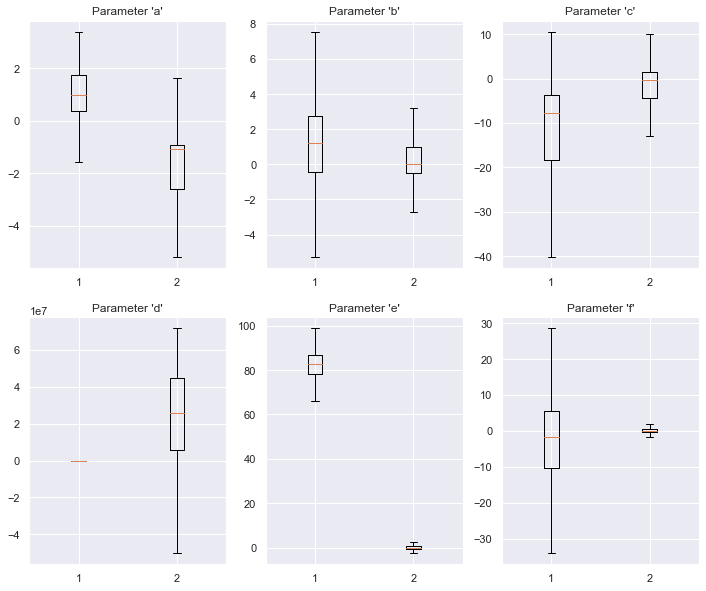

In [28]:
# Generate box plots for each column of the dataframe (other than the label):
fig, ax = plt.subplots(2,3,figsize=(12,10))
k = 0
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot([df_qps[df_qps['label'] == 1].iloc[:,k], df_qps[df_qps['label'] == 0].iloc[:,k]], showfliers=False)
        ax[i,j].set_title("Parameter '{}'".format(df_qps[df_qps['label'] == 1].columns[k]))
        ax[i,j].set_xticks([1,2], ["Spindles", "Non-Spindles"])
        k = k + 1
        
plt.savefig("scenario1_split_boxplot.png", dpi=300, bbox_inches='tight')

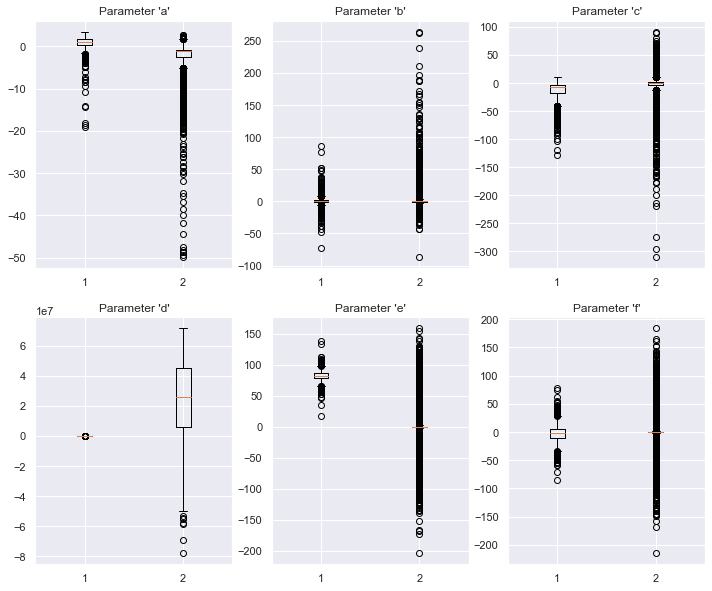

In [29]:
# Generate box plots for each column of the dataframe (other than the label):
fig, ax = plt.subplots(2,3,figsize=(12,10))
k = 0
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot([df_qps[df_qps['label'] == 1].iloc[:,k], df_qps[df_qps['label'] == 0].iloc[:,k]], showfliers=True)
        ax[i,j].set_title("Parameter '{}'".format(df_qps[df_qps['label'] == 1].columns[k]))
        ax[i,j].set_xticks([1,2], ["Spindles", "Non-Spindles"])
        k = k + 1
        
plt.savefig("scenario1_split_boxplot_withfliers.png", dpi=300, bbox_inches='tight')

<h3>T-Test Between QPS Features</h3>

Using the spindle and non-spindle datasets, we can perform the t-test for each column of both of the datasets

In [30]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

In [31]:
list_params = ['a', 'b', 'c', 'd', 'e', 'f']
p = {}

for param in list_params:
    (_, p[param]) = ttest_ind(spindles[param], non_spindles[param])

# Print out the p-values for each parameter:
for param in list_params:
    print("Parameter {}: p = {}".format(param, p[param]))

Parameter a: p = 5.809925334726916e-224
Parameter b: p = 0.3056563799477145
Parameter c: p = 3.7277012099986525e-59
Parameter d: p = 6.987350017064747e-236
Parameter e: p = 0.0
Parameter f: p = 7.042800306112751e-06


In [11]:
selected = []
for param in list_params:
    if p[param] <= 0.01:
        selected.append(param)


In [12]:
import time

All parameters have $p$ values that fall above the significance level of $\alpha = 1\%$. However, the best bet we have are parameters $a, c, d, e$ and $f$. We can produce a 3D scatter plot to see the degree of separation between the classes based on the best 3 features that exhibit the most statistical difference.

<h2>Preliminary Classification Using Neural Networks</h2>

In [32]:
# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)

# Split into X and y (feature vectors and label vector):
X = final_df[['a', 'b', 'c', 'd', 'e', 'f']]
y = final_df['label']

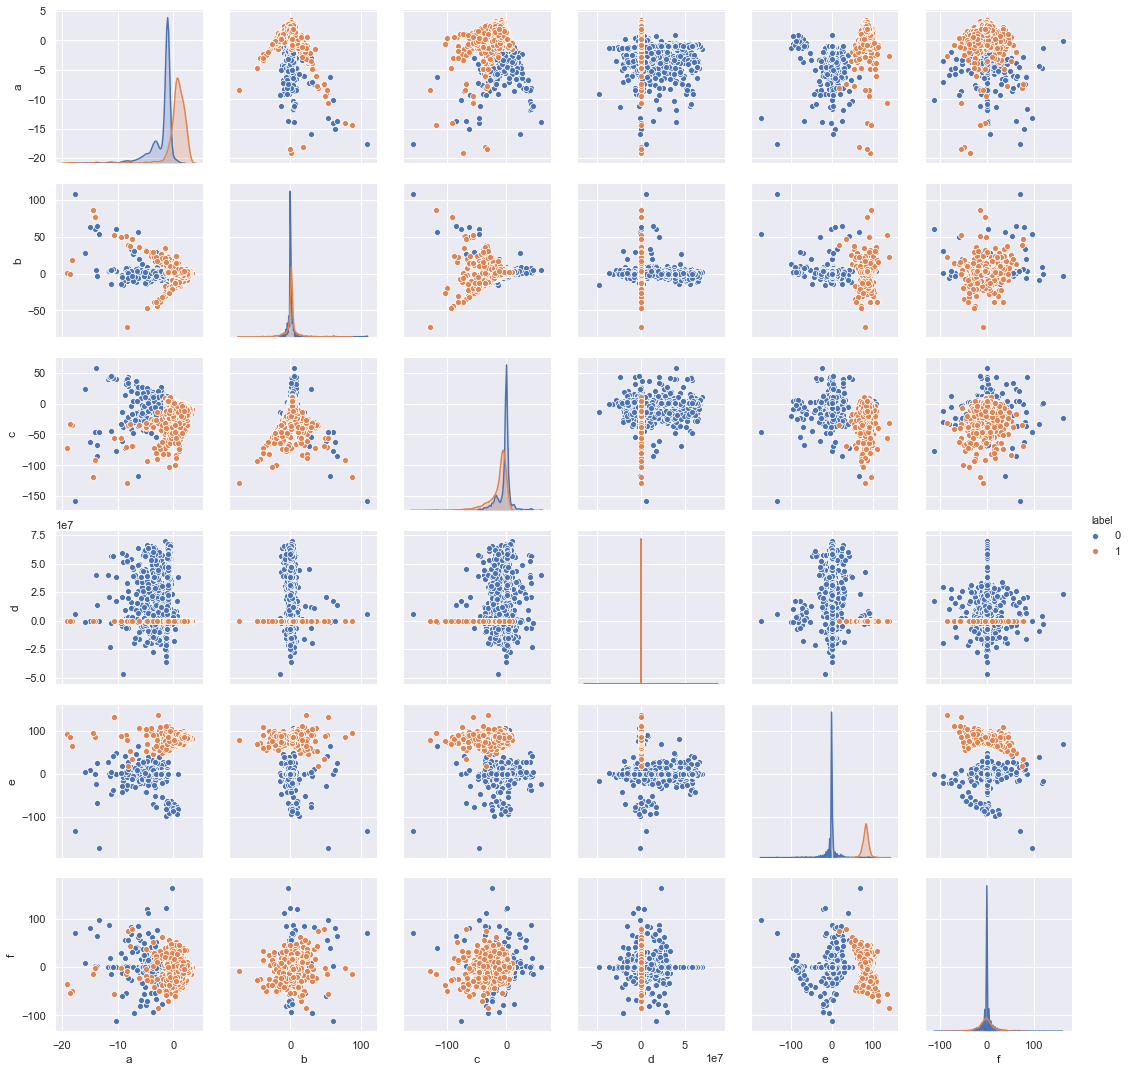

In [33]:
# We only want to plot the QPS parameters first to see how well the parameters seaparate the classes alone.
qps_viz = final_df[qps_params]
g = sns.pairplot(qps_viz, vars=['a', 'b', 'c', 'd', 'e', 'f'], hue="label")
plt.savefig("qps_pairplot_scorerbias.png", dpi=300, bbox_inches='tight')

In [39]:
# Import the PCA package:
from sklearn.decomposition import PCA

# Instantiate an instance of the PCA. Retain the two most important
# principal components in the feature set.
pca = PCA(n_components = 2)

# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)
final_df = final_df.sample(frac=1)

# Split into X and y (feature vectors and label vector):
X = final_df[list_params]
y = final_df['label']

# Standardise the feature vectors, X, using 'StandardScaler'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit the standardised dataframe onto the PCA model:
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

principal_df.head()

,principal component 1,principal component 2
0,-1.443231,0.146232
1,1.985678,-0.089782
2,-1.725604,-0.325528
3,-0.886904,0.953850
4,-1.088022,0.188190


In [40]:
pca.explained_variance_ratio_

array([0.35157404, 0.1918795 ])

In [41]:
# Concatenate the principal_df dataframe with the corresponding labels:
final_comps = pd.concat([principal_df, y], axis = 1)

# View the final dataframe:
final_comps.head()

,principal component 1,principal component 2,label
0,-1.443231,0.146232,1
1,1.985678,-0.089782,1
2,-1.725604,-0.325528,1
3,-0.886904,0.953850,1
4,-1.088022,0.188190,1


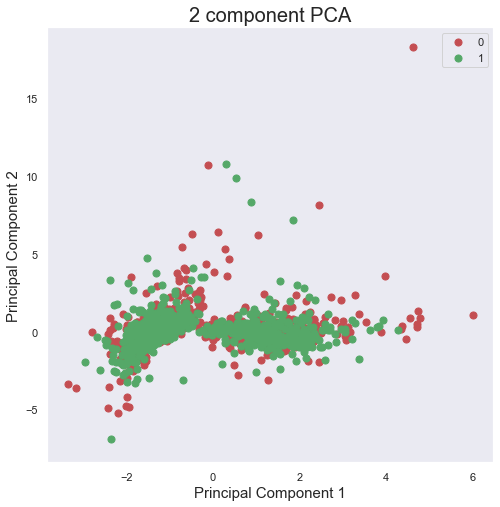

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = final_comps['label'] == target
    ax.scatter(final_comps.loc[indicesToKeep, 'principal component 1']
               , final_comps.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the 'all_features' dataframe into training and test subsets. CV is performed using 'cross_val_score'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn = Sequential()
model_nn.add(Dense(38, activation='relu', input_dim=6))
model_nn.add(Dense(38, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model_nn.fit(X_train, y_train, validation_split=0.2, epochs=250, callbacks=[es])

# # evaluate the model
# _, train_acc = model_nn.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model_nn.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# # plot training history
# fig = plt.figure(figsize=(12,6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1552 samples, validate on 388 samples
Epoch 1/250
1552/1552 [==============================] - 0s 242us/step - loss: 0.4691 - acc: 0.8698 - val_loss: 0.2836 - val_acc: 0.9768
Epoch 2/250
1552/1552 [==============================] - 0s 31us/step - loss: 0.1761 - acc: 0.9826 - val_loss: 0.1009 - val_acc: 0.9897
Epoch 3/250
1552/1552 [==============================] - 0s 34us/step - loss: 0.0752 - acc: 0.9897 - val_loss: 0.0616 - val_acc: 0.9897
Epoch 4/250
1552/1552 [==============================] - 0s 34us/step - loss: 0.0538 - acc: 0.9903 - val_loss: 0.0507 - val_acc: 0.9897
Epoch 5/250
1552/1552 [==============================] - 0s 33us/step - loss: 0.0464 - acc: 0.9903 - val_loss: 0.0469 - val_acc: 0.9923
Epoch 6/250
1552/1552 [==============================] - 0s 33us/step - loss: 0.0432 - acc: 0.9903 - val_loss: 0.0444 - val_acc: 0.9923
Epoch 7/250
1552

The final statistics show that:

- Final Training Accuracy = 99.1%
- Final Test Accuracy = 99.6%

The validation loss is less than 10%. Namely:

- Final Training Loss = 3.97%
- Final Validation Loss = 5.89%

Using earlystopping to ensure divergence in the loss does not occur, we see a overall decreasing trend in the loss for both the training and validation dataset. Using this model, we can perform a preliminary evaluation on the loss and accuracy using the test dataset and go from there:

<h3>With 5-fold Cross Validation</h3>

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(units=20, activation='relu', input_shape=(6,)))

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(units=10, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

# Evaluate neural network using three-fold cross-validation
cv_scores = cross_val_score(neural_network, X_train, y_train, cv=5)
avg_cv_score = np.mean(cv_scores)
print(avg_cv_score)

0.9871134112790688


In [15]:
# Evaluate the model using the test subset:
(model_nn_loss, model_nn_acc) = model_nn.evaluate(X_test, y_test)

# Print out the evaluative figures:
print("Loss Of Model 1: {}%".format(round(model_nn_loss,3) * 100))
print("Accuracy Of Model 1: {}%".format(round(model_nn_acc,3) * 100))

486/486 [==============================] - 0s 22us/step
Loss Of Model 1: 3.5000000000000004%
Accuracy Of Model 1: 99.4%


We should also get an idea of the <b>precision</b> and <b>recall</b> performance of the model as well as the <b>F1-score</b>. These have the following definitions:

<h3>Precision</h3>

\begin{equation}
    \text{Precision} = \frac{TP}{TP + FP}
\end{equation}

Precision tells us the degree to which our model can <b>correctly</b> predict the positive classes (true positive, TP). A wrong classification of a positive class is called a false positive (FP).

<h3>Recall</h3>

The recall is the ratio:

\begin{equation}
    \text{Recall} = \frac{TP}{TP + FN}
\end{equation}

where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<h3>F1 Score</h3>

The F1 Score is defined as:

\begin{equation}
    \text{F1 Score} = 2 \times \frac{Precision * Recall}{Precision + Recall}
\end{equation}

It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred = model_nn.predict_classes(X_test)

# Compute each metric:
acc = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)

# Print out the metrics:
print("Accuracy = {}".format(acc))
print("Recall = {}".format(recall))
print("Precision = {}".format(precision))
print("F1 Score = {}".format(f1_score))

Accuracy = 0.9897119341563786
Recall = 0.983402489626556
Precision = 0.9957983193277311
F1 Score = 0.9895615866388309


The above metrics tells us a few things:

- With <b>complete bias</b> between spindles and non-spindles, a neural network is able to completely predict between spindles and non-spindles with 99% accuracy.
- The recall metric shows that the complete bias initialisation allows the neural network to correctly classify 98% of the true positive spindles with only around 2% being classified as being false negatives.
- The precision metric shows that 100% of spindles were classified as being true positive.
- The F1 score of 99% justifies the perfect precision and recall ability of the neural network model.

We can also produce the AUC-ROC curve to visually see how well the model detects the true positive samples. With the above statistics, we should not be surprised to see a steep gradient in the initial part of the curve.

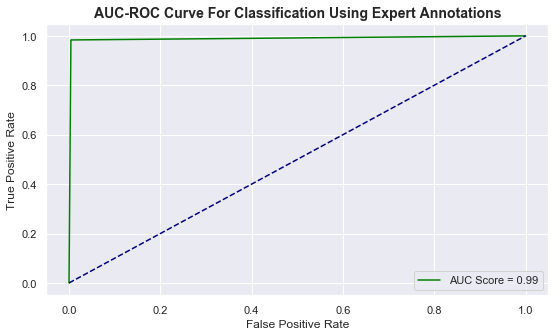

In [48]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr, tpr, thresholds) = roc_curve(y_pred, y_test)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score = auc(fpr, tpr)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,5))
plt.title("AUC-ROC Curve For Classification Using Expert Annotations", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr, tpr, color='green', label="AUC Score = {}".format(round(auc_score, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.savefig("auc_roc_biased.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Metrics AFTER Feature Selection</h3>

In [49]:
# New training and label set:
X_new = final_df[['a', 'c', 'd', 'e', 'f']]
y_new = final_df['label']

Train on 1552 samples, validate on 388 samples
Epoch 1/250
1552/1552 [==============================] - 1s 702us/step - loss: 0.5090 - acc: 0.8557 - val_loss: 0.3161 - val_acc: 0.9794
Epoch 2/250
1552/1552 [==============================] - 0s 55us/step - loss: 0.1847 - acc: 0.9897 - val_loss: 0.1290 - val_acc: 0.9845
Epoch 3/250
1552/1552 [==============================] - 0s 53us/step - loss: 0.0776 - acc: 0.9903 - val_loss: 0.0885 - val_acc: 0.9845
Epoch 4/250
1552/1552 [==============================] - 0s 82us/step - loss: 0.0538 - acc: 0.9897 - val_loss: 0.0783 - val_acc: 0.9845
Epoch 5/250
1552/1552 [==============================] - 0s 72us/step - loss: 0.0451 - acc: 0.9903 - val_loss: 0.0740 - val_acc: 0.9845
Epoch 6/250
1552/1552 [==============================] - 0s 66us/step - loss: 0.0412 - acc: 0.9903 - val_loss: 0.0718 - val_acc: 0.9845
Epoch 7/250
1552/1552 [==============================] - 0s 66us/step - loss: 0.0391 - acc: 0.9910 - val_loss: 0.0697 - val_acc: 0.9845


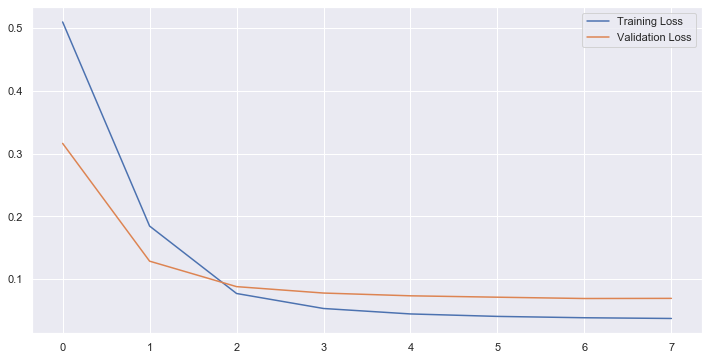

In [50]:
# Train-test splitting:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new)
X_train_new = std_scale.transform(X_train_new)
X_test_new = std_scale.transform(X_test_new)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn2 = Sequential()
model_nn2.add(Dense(38, activation='relu', input_dim=5))
model_nn2.add(Dense(38, activation='relu'))
model_nn2.add(Dense(1, activation='sigmoid'))

model_nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn2.fit(X_train_new, y_train_new, validation_split=0.2, epochs=250, callbacks=[es])

# evaluate the model
_, train_acc = model_nn2.evaluate(X_train_new, y_train_new, verbose=0)
_, test_acc = model_nn2.evaluate(X_test_new, y_test_new, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

The final results after the feature selection show that parameters $a$ and $c$  allow the validation loss to approach a loss of 72.8% and stay within that loss as opposed to growing further like the case with using all features. The final accuracies achieved by the model were:

- Training: 58.7%
- Test: 52.9%

Where the accuracies of both the training and the test set are essentially the same which is much better than having the drastically higher training accuracy than the validation accuracy in the first case which suggests overfitting occurred.

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred2 = model_nn2.predict_classes(X_test_new)

# Compute each metric:
acc2 = accuracy_score(y_pred2, y_test_new)
recall2 = recall_score(y_pred2, y_test_new)
precision2 = precision_score(y_pred2, y_test_new)
f1_score2 = f1_score(y_pred2, y_test_new)

# Print out the metrics:
print("Accuracy = {}".format(acc2))
print("Recall = {}".format(recall2))
print("Precision = {}".format(precision2))
print("F1 Score = {}".format(f1_score2))

Accuracy = 0.9897119341563786
Recall = 0.9798387096774194
Precision = 1.0
F1 Score = 0.9898167006109979


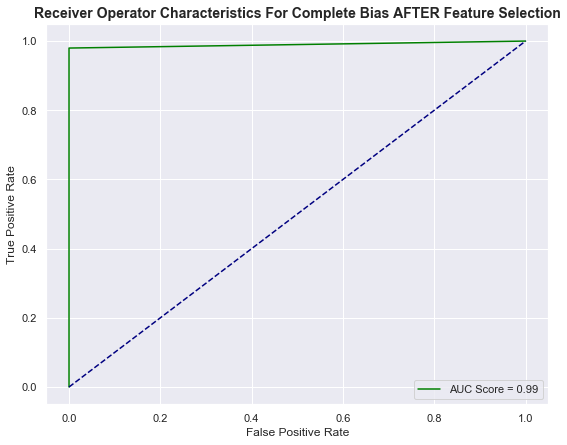

In [52]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr2, tpr2, thresholds2) = roc_curve(y_pred2, y_test_new)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score2 = auc(fpr2, tpr2)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr2, tpr2, color='green', label="AUC Score = {}".format(round(auc_score2, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

<h3>Introducing Dropout In Between Layers</h3>

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1552 samples, validate on 388 samples
Epoch 1/250
1552/1552 [==============================] - 1s 567us/step - loss: 0.4990 - acc: 0.8228 - val_loss: 0.2760 - val_acc: 0.9897
Epoch 2/250
1552/1552 [==============================] - 0s 140us/step - loss: 0.1945 - acc: 0.9820 - val_loss: 0.0926 - val_acc: 0.9897
Epoch 3/250
1552/1552 [==============================] - 0s 138us/step - loss: 0.1002 - acc: 0.9839 - val_loss: 0.0558 - val_acc: 0.9897
Epoch 4/250
1552/1552 [==============================] - 0s 138us/step - loss: 0.0708 - acc: 0.9852 - val_loss: 0.0437 - val_acc: 0.9897
Epoch 5/250
1552/1552 [==============================] - 0s 137us/step - loss: 0.0642 - acc: 0.9845 - val_loss: 0.0426 - val_acc: 0.9871
Epoch 6/250
1552/1552 [==============================] - 0s 142us/step - loss: 0.0621 - acc: 0.9884 - val_loss: 0.0432 - val_acc: 0.9871
Epoch 00006: ear

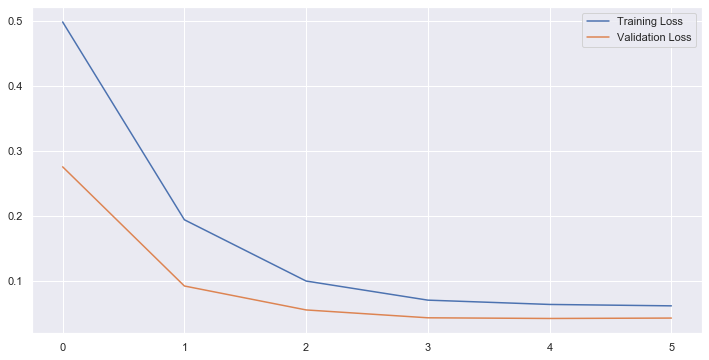

In [22]:
# Train-test splitting:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new2)
X_train_new2 = std_scale.transform(X_train_new2)
X_test_new2 = std_scale.transform(X_test_new2)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

model_nn3 = Sequential()
model_nn3.add(Dense(38, activation='relu', input_dim=5))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(38, activation='relu'))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(1, activation='sigmoid'))

model_nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn3.fit(X_train_new2, y_train_new2, validation_split=0.2, epochs=250, callbacks=[es])

# evaluate the model
_, train_acc = model_nn3.evaluate(X_train_new2, y_train_new2, verbose=0)
_, test_acc = model_nn3.evaluate(X_test_new2, y_test_new2, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

The introduction of a 30% dropout probability means that 30% of the time, neurons in the hidden layer are deactivated or ignored during the training process. This means their contribution to the neurons in the subsequent layers are not applied and neither do they contribute to neurons during the back propagation stage. This minimises the chances of the neural network overfitting to the data and allows the model to generalise.

For this particular scenario, we can see the training and test accuracies have maintained their levels:

- Training Accuracy = 56.1%
- Testing Accuracy = 49.6%

However, the validation loss for both the training and test data has improved compared to the last iteration where dropout was not included. The training and validation loss are:

- Training Loss = 67.80%
- Validation Loss = 71.02%

The validation loss has seen an approximate 2% improvement as a result of the dropout regularisation being introduced into the model.

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred3 = model_nn3.predict_classes(X_test_new2)

# Compute each metric:
acc3 = accuracy_score(y_pred3, y_test_new2)
recall3 = recall_score(y_pred3, y_test_new2)
precision3 = precision_score(y_pred3, y_test_new2)
f1_score3 = f1_score(y_pred3, y_test_new2)

# Print out the metrics:
print("Accuracy = {}".format(acc3))
print("Recall = {}".format(recall3))
print("Precision = {}".format(precision3))
print("F1 Score = {}".format(f1_score3))

Accuracy = 0.9897119341563786
Recall = 0.9836734693877551
Precision = 0.9958677685950413
F1 Score = 0.9897330595482547


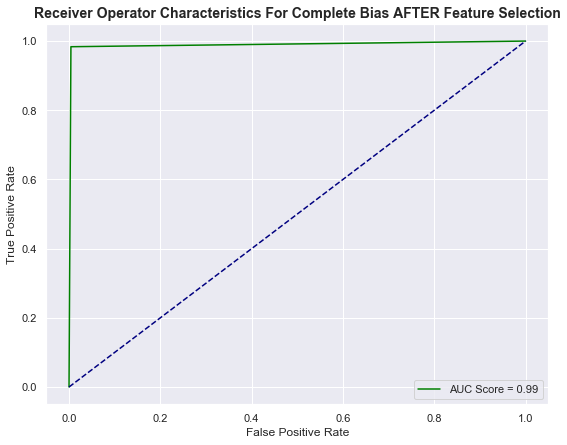

In [24]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr3, tpr3, thresholds3) = roc_curve(y_pred3, y_test_new2)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score3 = auc(fpr3, tpr3)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr3, tpr3, color='green', label="AUC Score = {}".format(round(auc_score3, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()